In [2]:
# SeqIO.parse(...)として呼び出せるように書いてください
"Bio(Biopython)からSeqIOモジュールをインポート" 
from Bio import SeqIO
# pd.DataFrame(...)が呼び出せるように書いてください
"pandasをpdと言う名前でインポート" 
import pandas as pd
# plt.figure()を実行できるように書いてください
"matplotlibのpyplotモジュールをpltという名前でインポート"
import matplotlib.pyplot as plt
import copy

In [3]:
path_to_genbank_file = ("/Users/miyakesho/Google_Drive/master/Class/生物情報実験法/python/task1/GCF_000231385.2_ASM23138v3_genomic.gbff") # 自分のファイルに書き換えてください
records = SeqIO.index(path_to_genbank_file, 'gb')

In [3]:
i=0
for record_id, record in records.items():
    for feature in record.features:
        if feature.type=="CDS":
            print(feature)
            i+=1
        if(i>2):
            break

type: CDS
location: [103:238](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: similar to AA sequence:RefSeq:WP_007777819.1']
    Key: locus_tag, Value: ['DESMER_RS22750']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology.']
    Key: old_locus_tag, Value: ['Desmer_0001']
    Key: product, Value: ['50S ribosomal protein L34']
    Key: protein_id, Value: ['WP_007777819.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MKRTYQPKNRRHKRVHGFLSRMSTPTGRNVIKRRRLKGRKKLSV']

type: CDS
location: [598:1960](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: similar to AA sequence:RefSeq:WP_014901041.1']
    Key: locus_tag, Value: ['DESMER_RS00005']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology.']
    Key: old_locus_tag, Value: ['Desmer_0002']
    Key: product, Val

In [4]:
#辞書作成

codon_dict={}
seq=["A","T","G","C"]
for i in seq:
    for j in seq:
        for k in seq:
            codon=i+j+k
            codon_dict[codon]=0
CDS_codon_dict=copy.copy(codon_dict)
tRNA_codon_dict=copy.copy(codon_dict)
tRNA_codon_dict

codon_to_Amino={
'TTT':'Phe',  'TTC':'Phe',  'TTA':'Leu',  'TTG':'Leu',  
'TCT':'Ser',  'TCC':'Ser',  'TCA':'Ser',  'TCG':'Ser',  
'TAT':'Tyr',  'TAC':'Tyr',  'TAA':'stop',  'TAG':'stop',  
'TGT':'Cys',  'TGC':'Cys',  'TGA':'stop',  'TGG':'Trp',  
'CTT':'Leu',  'CTC':'Leu',  'CTA':'Leu',  'CTG':'Leu',  
'CCT':'Pro',  'CCC':'Pro',  'CCA':'Pro',  'CCG':'Pro',  
'CAT':'His',  'CAC':'His',  'CAA':'Gln',  'CAG':'Gln',  
'CGT':'Arg',  'CGC':'Arg',  'CGA':'Arg',  'CGG':'Arg',  
'ATT':'Ile',  'ATC':'Ile',  'ATA':'Ile',  'ATG':'Met',  
'ACT':'Thr',  'ACC':'Thr',  'ACA':'Thr',  'ACG':'Thr',  
'AAT':'Asn',  'AAC':'Asn',  'AAA':'Lys',  'AAG':'Lys',  
'AGT':'Ser',  'AGC':'Ser',  'AGA':'Arg',  'AGG':'Arg',  
'GTT':'Val',  'GTC':'Val',  'GTA':'Val',  'GTG':'Val',  
'GCT':'Ala',  'GCC':'Ala',  'GCA':'Ala',  'GCG':'Ala',  
'GAT':'Asp',  'GAC':'Asp',  'GAA':'Glu',  'GAG':'Glu',  
'GGT':'Gly',  'GGC':'Gly',  'GGA':'Gly',  'GGG':'Gly'}

In [20]:
for record_id, record in records.items():
    for feature in record.features:
        if feature.type=="CDS":
            sequence=record.seq
            sequence=sequence[feature.location.start:feature.location.end]
            #print(sequence[0:30])
            if(len(sequence)<200):
                translate=feature.qualifiers["translation"]
                print(len(sequence)/3,len(translate[0]))
                print(sequence)
                print(feature)
            i=0
            while(i<len(sequence)-2):
                codon=sequence[i]+sequence[i+1]+sequence[i+2]
                CDS_codon_dict[codon]+=1
                i+=3
        elif feature.type=="tRNA":
            sequence=record.seq
            sequence=sequence[feature.location.start:feature.location.end]
            i=0
            while(i<len(sequence)-2):
                codon=sequence[i]+sequence[i+1]+sequence[i+2]
                tRNA_codon_dict[codon]+=1
                i+=3
display(tRNA_codon_dict)
display(CDS_codon_dict)

45.0 44
TTAAACTGATAATTTCTTCCGACCCTTTAAACGACGGCGCTTTATTACATTTCGCCCCGTTGGCGTACTCATACGGCTTAAAAAACCGTGAACACGCTTATGACGCCGATTCTTCGGTTGGTAGGTTCTCTTCAA
type: CDS
location: [103:238](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: similar to AA sequence:RefSeq:WP_007777819.1']
    Key: locus_tag, Value: ['DESMER_RS22750']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology.']
    Key: old_locus_tag, Value: ['Desmer_0001']
    Key: product, Value: ['50S ribosomal protein L34']
    Key: protein_id, Value: ['WP_007777819.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MKRTYQPKNRRHKRVHGFLSRMSTPTGRNVIKRRRLKGRKKLSV']

61.0 60
TTGTGTGATGAGGTCAGCGAATTAGATTGGCTTACAACAACTATTGGAATTCTTACTGATCTTTCTGAAAAAGCTGGAAAGAAATTATCCAAATTAATTAATCGTCAACTCCAACAATGGATTATGGCTCTAGCTGCTATATCAGAGTCGGCCTCATGGATTGGAGCCACAAGATATGAGTGA
type: CDS
location: [97540:97723](+)
qualifiers:
    Key: codon_st

GTGCTGAATATATTTGAACGGTTTGAGGAAGGCCACAGGTCAGAAATGCTGAGCAGACTTGATCCGGCGGTGATCAAGTCTATCTCAATCTTTTATTCTTATGAAGATGGGCGAGAGAACTTAAGAAATTTGAGGCATGACAATCATCATGTAGGCTGGTCTCGTGATAGTGGAAAAGAGCCGTAA
type: CDS
location: [511888:512074](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: ab initio prediction:GeneMarkS+']
    Key: locus_tag, Value: ['DESMER_RS02375']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: GeneMarkS+.']
    Key: product, Value: ['hypothetical protein']
    Key: protein_id, Value: ['WP_042333294.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MLNIFERFEEGHRSEMLSRLDPAVIKSISIFYSYEDGRENLRNLRHDNHHVGWSRDSGKEP']

64.0 63
GTGGCGGAAGAGGATGTCATAAAGAGGGCAGAGGCTGCTGTACAAGTCCGGCAAATGGGAAAAATGATGGCTTCGTTATTTTGCCATATGACGAAAGAGGTCCTTCGTGAACTGGGTGAGGTGCGGGGCACGGAACTGGTCGGGAGAGCGATAAAAGCTTATGGCAGCGAGCGAGGAGGTTGCCTCCATTGA
type: CDS
location: [537521:537713](+)
qualifiers:
    Key: co

KeyError: 'translation'

In [113]:
CDS_codon_df=[]
tRNA_codon_df=[]
for i,j in CDS_codon_dict.items():
    CDS_codon_df.append([i,j])
CDS_codon_df = pd.DataFrame(CDS_codon_df,columns=["codon","count"])
for i,j in tRNA_codon_dict.items():
    tRNA_codon_df.append([i,j])
tRNA_codon_df = pd.DataFrame(tRNA_codon_df,columns=["codon","count"])
tRNA_codon_df

,codon,count
0,AAA,16
1,AAT,17
2,AAG,32
3,AAC,46
4,ATA,14
5,ATT,10
6,ATG,9
7,ATC,38
8,AGA,19
9,AGT,14


In [114]:
def normalization(df,name,target,gene):
    sumation=0
    for i in df[target]:
        sumation+=i
    
    new_df=[]
    for i in range(0,len(df)):
        col=df.iloc[i]
        new_df.append([col[0],col[1]/sumation,gene])
    new_df=pd.DataFrame(new_df,columns=name)
    return new_df

In [115]:
normed_tRNA_codon_df=normalization(tRNA_codon_df,["codon","count","gene"],"count","tRNA")
normed_CDS_codon_df=normalization(CDS_codon_df,["codon","count","gene"],"count","CDS")
gene_codon=pd.concat([normed_tRNA_codon_df, normed_CDS_codon_df])

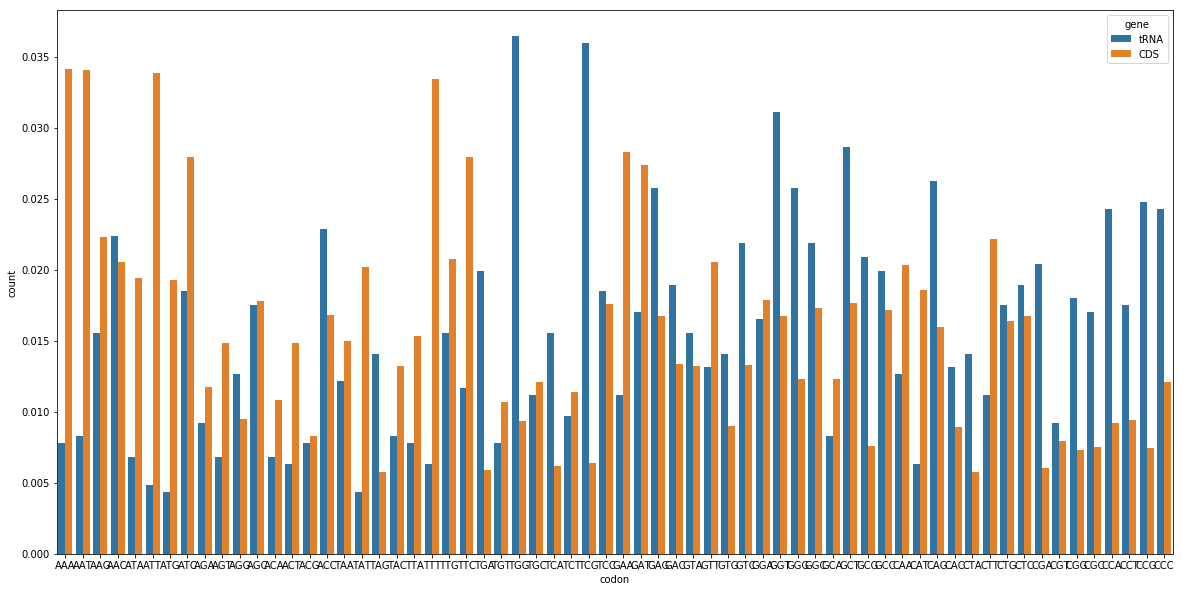

In [96]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x="codon", y="count", hue="gene", data=gene_codon)


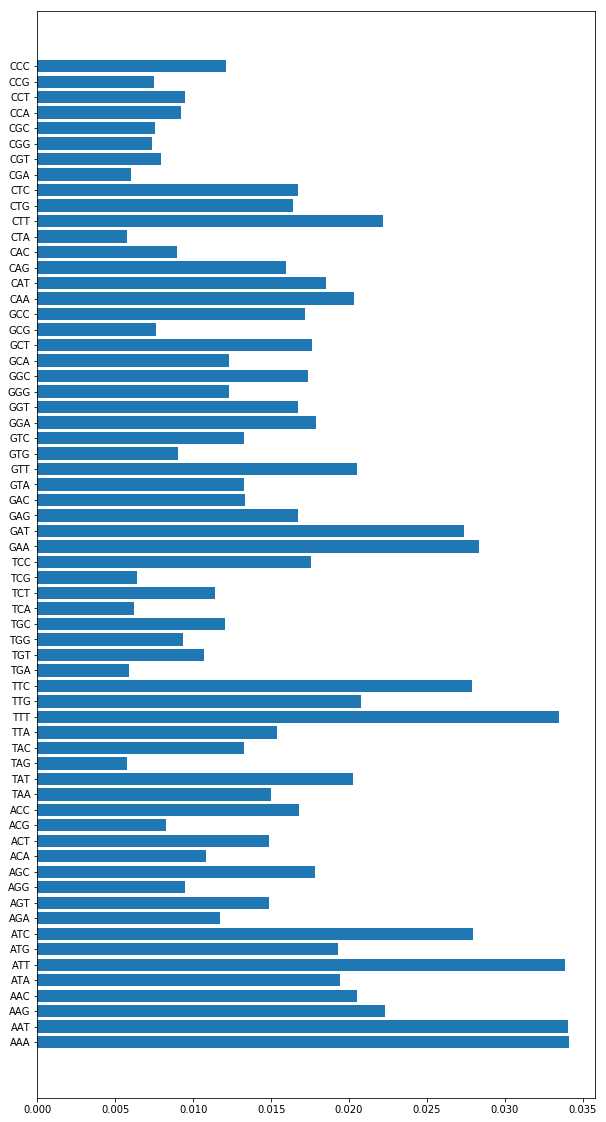

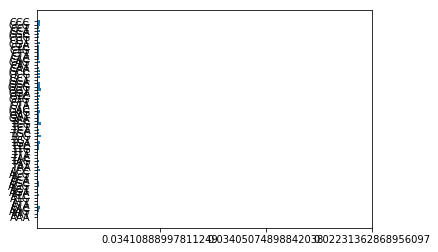

<Figure size 432x288 with 0 Axes>

In [172]:
fig, ax1 = plt.subplots(figsize=(10, 20))

plt.barh(normed_CDS_codon_df["codon"],normed_CDS_codon_df["count"]
        )
plt.show()
plt.barh(normed_tRNA_codon_df["codon"],normed_tRNA_codon_df["count"]
        )
plt.xticks([1.15, 2.15, 3.15], normed_CDS_codon_df["count"])
plt.show()
plt.savefig("a.png",dpi=300)

In [150]:
amino_count_dict={}
for i in range(len(CDS_codon_df)):
    row=CDS_codon_df.iloc[i]
    Amino=codon_to_Amino[row.codon]
    Count=row["count"]
    #print(Amino,Count)
    if codon not in amino_count:
        amino_count_dict[Amino]=Count
    else:
        amino_count_dict[Amino]+=Count
display(amino_count)
amino_count_df=[]
for i,j in amino_count_dict.items():
    amino_count_df.append([i,j])
amino_count_df=pd.DataFrame(amino_count_df,columns=["Amino acid","count"])
amino_count_df

{'Lys': 30319,
 'Asn': 27893,
 'Ile': 37999,
 'Met': 26174,
 'Arg': 10255,
 'Ser': 23883,
 'Thr': 22828,
 'stop': 8003,
 'Tyr': 17978,
 'Leu': 22714,
 'Phe': 37929,
 'Cys': 16395,
 'Trp': 12689,
 'Glu': 22726,
 'Asp': 18124,
 'Val': 18056,
 'Gly': 23565,
 'Ala': 23355,
 'Gln': 21670,
 'His': 12140,
 'Pro': 16484}

,Amino acid,count
0,Lys,30319
1,Asn,27893
2,Ile,37999
3,Met,26174
4,Arg,10255
5,Ser,23883
6,Thr,22828
7,stop,8003
8,Tyr,17978
9,Leu,22714


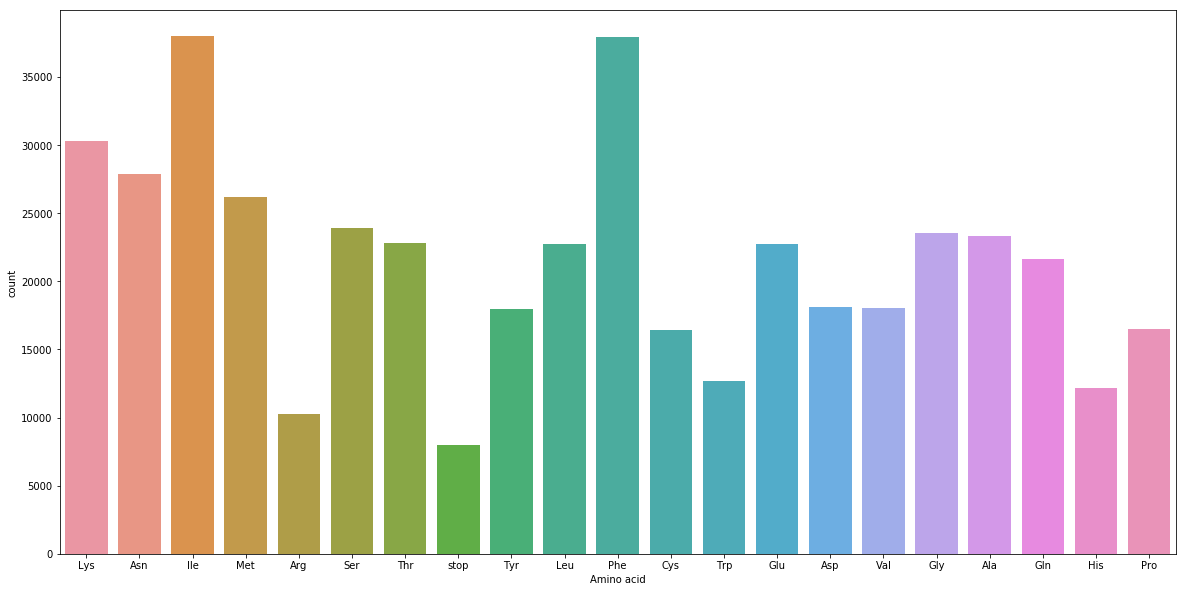

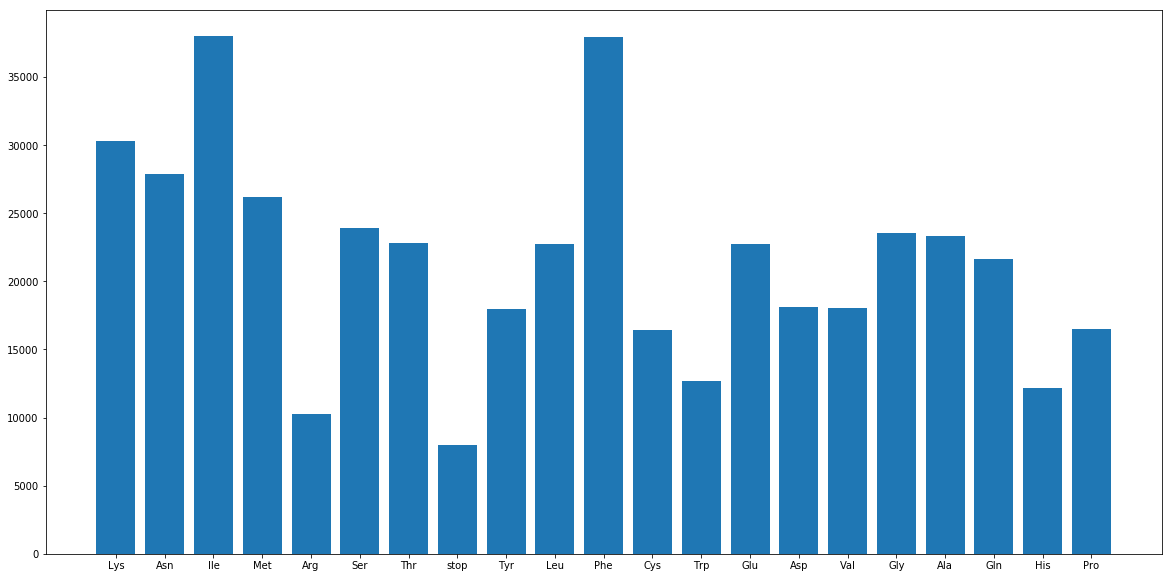

In [160]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Amino acid", y="count", data=amino_count_df)
plt.show()
plt.figure(figsize=(20, 10))
plt.bar(amino_count_df["Amino acid"], amino_count_df["count"])
plt.show()

In [72]:
i=0
for feature in record.features:
    print(feature)
    if (i==10):
        break
    i+=1

type: source
location: [0:4873567](+)
qualifiers:
    Key: collected_by, Value: ['Wendy Robertson']
    Key: collection_date, Value: ['Jan-1996']
    Key: country, Value: ['Australia: Perth, Western Australia']
    Key: culture_collection, Value: ['DSM:13257']
    Key: db_xref, Value: ['taxon:768704']
    Key: isolation_source, Value: ['groundwater contaminated with aromatic compounds from motor fuel in sandy soil from Eden Hill, Swan Coasatal Plain']
    Key: lat_lon, Value: ['31.471 S 115.084 E']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Desulfosporosinus meridiei DSM 13257']
    Key: strain, Value: ['DSM 13257']

type: gene
location: [103:238](-)
qualifiers:
    Key: locus_tag, Value: ['DESMER_RS22750']
    Key: old_locus_tag, Value: ['Desmer_0001']

type: CDS
location: [103:238](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: similar to AA sequence:RefSeq:WP_007777819.1']
    Key: locus_tag, Value: ['DESMER_RS2

In [78]:
len(record.seq)

4873567

In [4]:
gene_list={}
for record_id, record in records.items():
    for feature in record.features:
        gene=feature.type
        if gene=="ncRNA":
            print(feature)
        if gene not in gene_list:
            gene_list[gene]=1
        else:
            gene_list[feature.type]+=1
gene_list

type: ncRNA
location: [15754:16020](+)
qualifiers:
    Key: db_xref, Value: ['RFAM:RF01854']
    Key: gene, Value: ['ffs']
    Key: inference, Value: ['COORDINATES: nucleotide motif:Rfam:12.0:RF01854', 'COORDINATES: profile:INFERNAL:1.1.1']
    Key: locus_tag, Value: ['DESMER_RS22755']
    Key: ncRNA_class, Value: ['SRP_RNA']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: cmsearch.']
    Key: product, Value: ['signal recognition particle sRNA large type']

type: ncRNA
location: [2753970:2754152](-)
qualifiers:
    Key: db_xref, Value: ['RFAM:RF00013']
    Key: gene, Value: ['ssrS']
    Key: inference, Value: ['COORDINATES: nucleotide motif:Rfam:12.0:RF00013', 'COORDINATES: profile:INFERNAL:1.1.1']
    Key: locus_tag, Value: ['DESMER_RS23045']
    Key: ncRNA_class, Value: ['other']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: cmsearch.']
    Key: product, Value: ['6S RNA']

type: ncRN

{'source': 1,
 'gene': 4554,
 'CDS': 4438,
 'tRNA': 80,
 'ncRNA': 3,
 'rRNA': 31,
 'regulatory': 49,
 'tmRNA': 2}

In [164]:
import sys
sys.path

['/Users/miyakesho/Google_Drive/master/Class/生物情報実験法/python/task2',
 '/anaconda3/lib/python37.zip',
 '/anaconda3/lib/python3.7',
 '/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/anaconda3/lib/python3.7/site-packages',
 '/anaconda3/lib/python3.7/site-packages/aeosa',
 '/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/miyakesho/.ipython']

In [137]:
CDS_codon_df

,codon,count
0,AAA,46346
1,AAT,46267
2,AAG,30319
3,AAC,27893
4,ATA,26368
5,ATT,46023
6,ATG,26174
7,ATC,37999
8,AGA,15915
9,AGT,20157
